Read price-related datasets and print some important features. 
Files that are read are:
- '../data/external/WFP_2020Dec23_Senegal_FoodPricesData.csv', from https://dataviz.vam.wfp.org/economic_explorer/price-forecasts-alerts
- '../data/external/wfp_food_prices_senegal.csv', from https://data.humdata.org/dataset/wfp-food-prices-for-senegal
- '../data/external/wfp_food_median_prices_senegal.csv', from , from https://data.humdata.org/dataset/wfp-food-prices-for-senegal
- '../data/external/FAO-FPMA/IPA' (several files), from https://fpma.apps.fao.org/giews/food-prices/tool/public/#/dataset/domestic

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import glob 
import csv
# EA: need to make sure that the relative path works on the git repo

# OC:
from datetime import datetime

In [2]:
# OC: pathlib usage based on: https://omdena-gpsdd-senegal.slack.com/archives/C01G1NXN1L3/p1608718807063100?thread_ts=1608672331.062400&cid=C01G1NXN1L3
from pathlib import Path

data_folder = Path.cwd().parent.parent.joinpath('data', 'external')
print(data_folder)

/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external


In [3]:
file_name = "washdash-download.csv"
input_file_path = Path(data_folder).joinpath("external", file_name)

### Starting with the first WFP price dataset - with forecasts

In [4]:
# OC: pathlib
file_name = 'WFP_2020Dec23_Senegal_FoodPricesData.csv'
input_file_name = Path(data_folder).joinpath(file_name)
wfp_with_forecast_all_prices = pd.read_csv(input_file_name)
#------------

print("\nDescription, and first 3 elements")
print(wfp_with_forecast_all_prices.describe(include='all'))
print("\n")
print(wfp_with_forecast_all_prices.head(3))


Description, and first 3 elements
        Country Admin 1 Market Commodity Price Type          Year  \
count     20622   20622  20622     20622      20622  20622.000000   
unique        1      14     43         5          1           NaN   
top     Senegal   Thies  Thies    Millet     Retail           NaN   
freq      20622    2400    865      6661      20622           NaN   
mean        NaN     NaN    NaN       NaN        NaN   2013.711522   
std         NaN     NaN    NaN       NaN        NaN      4.236068   
min         NaN     NaN    NaN       NaN        NaN   2000.000000   
25%         NaN     NaN    NaN       NaN        NaN   2010.000000   
50%         NaN     NaN    NaN       NaN        NaN   2014.000000   
75%         NaN     NaN    NaN       NaN        NaN   2017.000000   
max         NaN     NaN    NaN       NaN        NaN   2021.000000   

               Month         Price         Trend          PEWI ALPS phase  \
count   20622.000000  17860.000000  17330.000000  17330.000

In [5]:
wfp_with_forecast_commodity_list = wfp_with_forecast_all_prices["Commodity"].unique()
print("Commodities:")
print(wfp_with_forecast_commodity_list)

print("Admins:")
wfp_with_forecast_admin1_list = wfp_with_forecast_all_prices["Admin 1"].unique()
print(wfp_with_forecast_admin1_list)

print("Markets:")
wfp_with_forecast_market_list = wfp_with_forecast_all_prices["Market"].unique()
print(wfp_with_forecast_market_list)

print("Data Types:")
wfp_with_forecast_data_type_list = wfp_with_forecast_all_prices["Data Type"].unique()
print(wfp_with_forecast_data_type_list)

Commodities:
['Maize (local)' 'Millet' 'Rice (imported)' 'Maize (imported)'
 'Rice (local)']
Admins:
['Kedougou' 'Sedhiou' 'Kaffrine' 'Dakar' 'Kaolack' 'Kolda' 'Tambacounda'
 'Thies' 'Ziguinchor' 'Diourbel' 'Fatick' 'Louga' 'Matam' 'Saint louis']
Markets:
['Kedougou' 'Sedhiou' 'Birkelane' 'Kaffrine' 'Koungueul' 'Mabo' 'Castors'
 'Dakar' 'Gueule Tapee' 'Thiaroye' 'Tilene' 'Diama Gadio' 'Kaolack'
 "N'Doffane" 'Ndrame Escale' 'Porokhane' 'Kolda' 'Bakel' 'Kouthiaba'
 'Mereto' 'Tambacounda' 'Mbafaye' 'Thies' 'Thilmakha' 'Touba Toul'
 'Saint-Maur' 'Bambey' 'Diourbel' 'Touba' 'Diakhao' 'Fatick' 'Gossas'
 'Keur I. Yacine' 'Missirah' 'Passy' 'Gouille Mbeuth' 'Louga' 'Matam'
 'Orkodiere' 'Ourossogui' 'Thiodaye' 'Mpal' 'Saint-Louis']
Data Types:
['Actual' 'Forecast']


In [6]:
print("**********"*5)
print("Starting with the second WFP price dataset")
wfp_humdata_all_prices = pd.read_csv('../../data/external/wfp_food_prices_senegal.csv', header = 0, skiprows = [1])
print("\nDescription, and first 3 elements")
print(wfp_humdata_all_prices.describe(include='all'))
print("\n")
print(wfp_humdata_all_prices.head(3))

**************************************************
Starting with the second WFP price dataset

Description, and first 3 elements
              date           cmname   unit            category         price  \
count        31806            31806  31806               31806  31806.000000   
unique         250               12      1                   2           NaN   
top     2020-11-15  Millet - Retail     KG  cereals and tubers           NaN   
freq           264             7411  31806               31523           NaN   
mean           NaN              NaN    NaN                 NaN    239.509762   
std            NaN              NaN    NaN                 NaN     70.041993   
min            NaN              NaN    NaN                 NaN     90.000000   
25%            NaN              NaN    NaN                 NaN    197.500000   
50%            NaN              NaN    NaN                 NaN    229.000000   
75%            NaN              NaN    NaN                 NaN    275.0

In [7]:
wfp_humdata_category_list = wfp_humdata_all_prices["category"].unique()
print("Categories:")
print(wfp_humdata_category_list)

wfp_humdata_cmname_list = wfp_humdata_all_prices["cmname"].unique()
print("Commodities:")
print(wfp_humdata_cmname_list)

wfp_humdata_unit_list = wfp_humdata_all_prices["unit"].unique()
print("Units:")
print(wfp_humdata_unit_list)

print("Admins:")
wfp_humdata_admname_list = wfp_humdata_all_prices["admname"].unique()
print(wfp_humdata_admname_list)

print("Markets:")
wfp_humdata_mktname_list = wfp_humdata_all_prices["mktname"].unique()
print(wfp_humdata_mktname_list)

Categories:
['cereals and tubers' 'pulses and nuts']
Commodities:
['Maize (local) - Retail' 'Rice (imported) - Retail' 'Sorghum - Retail'
 'Rice (local) - Retail' 'Millet - Retail'
 'Groundnuts (unshelled) - Retail' 'Groundnuts (shelled) - Retail'
 'Beans (niebe) - Retail' 'Maize (imported) - Retail'
 'Rice (ordinary, first quality) - Retail'
 'Rice (ordinary, second quality) - Retail' 'Sorghum (imported) - Retail']
Units:
['KG']
Admins:
['Kedougou' 'Sedhiou' 'Kaffrine' 'Dakar' 'Kaolack' 'Kolda' 'Tambacounda'
 'Thies' 'Ziguinchor' 'Diourbel' 'Fatick' 'Louga' 'Matam' 'Saint louis']
Markets:
['Kedougou' 'Salémata' 'Mako' 'Sedhiou' 'Kaffrine' 'Koungueul' 'Mabo'
 'Dioli Mandakh' 'Birkelane' 'Castors' 'Dakar' 'Thiaroye' 'Tilene'
 'Gueule Tapee' 'Kaolack' 'Porokhane' 'Ndrame Escale' "N'Doffane"
 'Diama Gadio' 'Diaobe' 'Kolda' 'Sare Yoba' 'Bakel' 'Kouthiaba' 'Mereto'
 'Tambacounda' 'Mbafaye' 'Thies' 'Thilmakha' 'Touba Toul' 'Bignona'
 'Oussouye' 'Zigiunchor' 'Saint-Maur' 'Bambey' 'Diourbel' '

In [8]:
print("**********"*5)
print("Starting with the third WFP price dataset - medians")

# OC: pathlib
file_name = 'wfp_food_median_prices_senegal.csv'
input_file_name = Path(data_folder).joinpath(file_name)
wfp_humdata_median_prices = pd.read_csv(input_file_name, header = 0, skiprows = [1])
# -------------

print("\nDescription, and first 3 elements")
print(wfp_humdata_median_prices.describe(include='all'))
print("\n")
print(wfp_humdata_median_prices.head(3))
# EA: I did not expect this to be per market, so what is the median over? 

**************************************************
Starting with the third WFP price dataset - medians

Description, and first 3 elements
              date                         cmname unit            category  \
count          710                            710  710                 710   
unique          71                             10    1                   2   
top     2017-07-15  Groundnuts (shelled) - Retail   KG  cereals and tubers   
freq            10                             71  710                 497   
mean           NaN                            NaN  NaN                 NaN   
std            NaN                            NaN  NaN                 NaN   
min            NaN                            NaN  NaN                 NaN   
25%            NaN                            NaN  NaN                 NaN   
50%            NaN                            NaN  NaN                 NaN   
75%            NaN                            NaN  NaN                 NaN   
max 

In [9]:
wfp_humdata_median_category_list = wfp_humdata_median_prices["category"].unique()
print("Categories:")
print(wfp_humdata_median_category_list)

wfp_humdata_median_cmname_list = wfp_humdata_median_prices["cmname"].unique()
print("Commodities:")
print(wfp_humdata_median_cmname_list)

wfp_humdata_median_unit_list = wfp_humdata_median_prices["unit"].unique()
print("Units:")
print(wfp_humdata_median_unit_list)

print("Admins:")
wfp_humdata_median_admname_list = wfp_humdata_median_prices["admname"].unique()
print(wfp_humdata_median_admname_list)

print("Markets:")
wfp_humdata_median_mktname_list = wfp_humdata_median_prices["mktname"].unique()
print(wfp_humdata_median_mktname_list)

Categories:
['pulses and nuts' 'cereals and tubers']
Commodities:
['Beans (niebe) - Retail' 'Groundnuts (shelled) - Retail'
 'Groundnuts (unshelled) - Retail' 'Maize (imported) - Retail'
 'Maize (local) - Retail' 'Millet - Retail' 'Rice (imported) - Retail'
 'Rice (local) - Retail' 'Rice (ordinary, first quality) - Retail'
 'Sorghum - Retail']
Units:
['KG']
Admins:
[nan 'Fatick' 'Kolda' 'Tambacounda' 'Kaolack' 'Kedougou' 'Dakar'
 'Diourbel' 'Matam' 'Thies' 'Sedhiou' 'Kaffrine' 'Louga' 'Saint louis']
Markets:
[nan 'Fatick' 'Kolda' 'Tambacounda' 'Kaolack' 'Gossas' 'Kedougou'
 'Porokhane' 'Thiaroye' 'Castors' 'Diourbel' 'Orkodiere' 'Gueule Tapee'
 'Thies' 'Touba Toul' 'Thilmakha' 'Diaobe' 'Mbafaye' 'Tilene'
 'Keur I. Yacine' 'Sare Yoba' 'Bambey' 'Sedhiou' 'Kaffrine'
 'Ndrame Escale' 'Salémata' 'Mako' 'Gouille Mbeuth' 'Louga' 'Mpal' 'Bakel'
 'Mabo' 'Passy' 'Diakhao' 'Saint-Louis' 'Touba' 'Dakar' 'Matam'
 "N'Doffane" 'Missirah' 'Ndindy' 'Ourossogui' 'Thiodaye' 'Koungueul'
 'Mereto']


In [10]:
print("**********"*5)
print("Starting with the FAO price and anomaly indicator datasets")
# The data is contained in different files in this case

# The data is contained in different files in this case
# Each file contains the data for each available region, commodity pairing

# First get a list of all the files in the directory 
# OC: pathlib, glob generator
file_list = glob.glob(str(Path(data_folder).joinpath('FAO-FPMA', 'IPA', '*.csv')), recursive=True)

print("Number of files in the directory: {0}".format(len(file_list))) 
print("List of files in the directory:")
for f in file_list:
    print(f)

**************************************************
Starting with the FAO price and anomaly indicator datasets
Number of files in the directory: 23
List of files in the directory:
/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/FAO-FPMA/IPA/data_table_1608989942387.csv
/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/FAO-FPMA/IPA/data_table_1608994910376.csv
/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/FAO-FPMA/IPA/data_table_1608994814214.csv
/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/FAO-FPMA/IPA/data_table_1608994428537.csv
/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/FAO-FPMA/IPA/data_table_1608994880439.csv
/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/FAO-FPMA/IPA/data_table_1608989686778.csv
/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/FAO-FPMA/IPA/data_table_1608994986245.csv
/home/caj

In [11]:
# Create a dictionary of commodoties - files and admins - files
dict_commodities = {}
dict_admins = {}

for i, f in enumerate(file_list):
    # First get the needed information from the first line of the file
    with open(f, newline='', encoding='utf-8-sig') as first_line_file:
        read_first_line_file = csv.reader(first_line_file, delimiter=',')
        title_line = next(read_first_line_file)
        #print(title_line)
    first_line_entries = title_line[0].split(", ")
    country = first_line_entries[0]
    price_type = first_line_entries[1]
    region = first_line_entries[2]
    commodity = first_line_entries[3]    
    if commodity not in dict_commodities:
        dict_commodities[commodity] = [f]
    else:
        dict_commodities[commodity].append(f)
    if region not in dict_admins:
        dict_admins[region] = [f]
    else:
        dict_admins[region].append(f)
    
    # Now get the data
    read_file = pd.read_csv(f, header = 1, encoding='utf-8-sig')
    #print only for a few files
    if i < 3:
        print(read_file.describe(include='all'))
        print(read_file.head(3))     

#print(dict_commodities) 
#print(dict_admins)    

       Date-Monthly  Ipa series  Real Price
count           143  131.000000  138.000000
unique          143         NaN         NaN
top          Jan-11         NaN         NaN
freq              1         NaN         NaN
mean            NaN   -1.416565  190.750435
std             NaN   16.016465   28.036994
min             NaN -182.220000  107.660000
25%             NaN   -0.705000  170.265000
50%             NaN    0.060000  191.535000
75%             NaN    0.820000  212.332500
max             NaN    7.400000  260.430000
  Date-Monthly  Ipa series  Real Price
0       Nov-20        0.03      225.88
1       Oct-20        0.85      253.46
2       Sep-20       -0.07      252.15
       Date-Monthly  Ipa series  Real Price
count           143  131.000000  143.000000
unique          143         NaN         NaN
top          Jan-11         NaN         NaN
freq              1         NaN         NaN
mean            NaN    0.089008  201.863706
std             NaN    1.418816   28.387177
min     

In [12]:
print("Commodities:")
print(dict_commodities.keys())
print("Admins (regions in this case):")
print(dict_admins.keys())

Commodities:
dict_keys(['Millet', 'Rice (imported)', 'Sorghum'])
Admins (regions in this case):
dict_keys(['Zguinchor', 'Thies', 'SaintLouis', 'Kaolack', 'Tambacounda', 'Dakar', 'Louga', 'Kolda', 'Matam', 'Diourbel', 'Fatick'])


In [13]:
for key in dict_admins.keys():
    print(dict_admins[key])
    
    break

['/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/FAO-FPMA/IPA/data_table_1608989942387.csv', '/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/FAO-FPMA/IPA/data_table_1608994986245.csv', '/home/cajanond/Documents/omdena/GPSDD-Food-Security-Senegal/data/external/FAO-FPMA/IPA/data_table_1608994960169.csv']


In [14]:
cols = ['Date-Monthly', 'Ipa series', 'Real Price', 'market_type', 'region', 'crop_type']

def read_csv_market(input_file_name):
    df = pd.read_csv(input_file_name)

    desc = df.columns[0].split(', ')
    print(desc)
    df['market_type'] = desc[1]
    df['region'] = desc[2]
    df['crop_type'] = desc[3]
    df.columns = cols
    df.drop(0, inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

df_market = pd.DataFrame(columns = cols)

for f in file_list:
    temp_df = read_csv_market(f)
    df_market = df_market.append(temp_df)

['Senegal', 'Retail', 'Zguinchor', 'Millet']
['Senegal', 'Retail', 'Thies', 'Millet']
['Senegal', 'Retail', 'SaintLouis', 'Rice (imported)']
['Senegal', 'Retail', 'Kaolack', 'Rice (imported)']
['Senegal', 'Retail', 'Tambacounda', 'Rice (imported)']
['Senegal', 'Retail', 'Dakar', 'Rice (imported)']
['Senegal', 'Retail', 'Zguinchor', 'Rice (imported)']
['Senegal', 'Retail', 'Louga', 'Millet']
['Senegal', 'Retail', 'Zguinchor', 'Millet']
['Senegal', 'Retail', 'Kolda', 'Millet']
['Senegal', 'Retail', 'Matam', 'Sorghum']
['Senegal', 'Retail', 'Dakar', 'Sorghum']
['Senegal', 'Retail', 'Diourbel', 'Rice (imported)']
['Senegal', 'Retail', 'Kolda', 'Rice (imported)']
['Senegal', 'Retail', 'Louga', 'Rice (imported)']
['Senegal', 'Retail', 'Dakar', 'Millet']
['Senegal', 'Retail', 'Matam', 'Millet']
['Senegal', 'Retail', 'Kaolack', 'Millet']
['Senegal', 'Retail', 'Matam', 'Rice (imported)']
['Senegal', 'Retail', 'SaintLouis', 'Millet']
['Senegal', 'Retail', 'Thies', 'Rice (imported)']
['Senegal', 

There is only one type of market data

In [15]:
df_market['market_type'].unique()

array(['Retail'], dtype=object)

In [16]:
# so we drop it
df_market.drop('market_type', inplace=True, axis=1)

In [17]:
date = df_market['Date-Monthly'].to_list()

In [18]:
dtime = [datetime.strptime(d, '%b-%y').strftime('%Y-%m') for d in date]

In [19]:
df_market['date'] = dtime

In [20]:
df_market

,Date-Monthly,Ipa series,Real Price,region,crop_type,date
0,Nov-20,0.03,225.88,Zguinchor,Millet,2020-11
1,Oct-20,0.85,253.46,Zguinchor,Millet,2020-10
2,Sep-20,-0.07,252.15,Zguinchor,Millet,2020-09
3,Aug-20,0.56,254.53,Zguinchor,Millet,2020-08
4,Jul-20,0.16,226.84,Zguinchor,Millet,2020-07
...,...,...,...,...,...,...
139,May-09,NaN,199.41,Fatick,Millet,2009-05
140,Apr-09,NaN,193.26,Fatick,Millet,2009-04
141,Mar-09,NaN,176.99,Fatick,Millet,2009-03
142,Feb-09,NaN,173.90,Fatick,Millet,2009-02


In [21]:
df_market.drop('Date-Monthly', inplace=True, axis=1)

In [22]:
df_market.head()

,Ipa series,Real Price,region,crop_type,date
0,0.03,225.88,Zguinchor,Millet,2020-11
1,0.85,253.46,Zguinchor,Millet,2020-10
2,-0.07,252.15,Zguinchor,Millet,2020-09
3,0.56,254.53,Zguinchor,Millet,2020-08
4,0.16,226.84,Zguinchor,Millet,2020-07


In [23]:
df_market.describe()

,Ipa series,Real Price,region,crop_type,date
count,3010,3097,3290,3290,3290
unique,611,2436,11,3,144
top,0.06,367.86,Zguinchor,Millet,2013-10
freq,26,12,429,1574,23


In [24]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3290 entries, 0 to 143
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Ipa series  3010 non-null   object
 1   Real Price  3097 non-null   object
 2   region      3290 non-null   object
 3   crop_type   3290 non-null   object
 4   date        3290 non-null   object
dtypes: object(5)
memory usage: 154.2+ KB


In [25]:
df_market['Real Price'] = df_market['Real Price'].astype(float)
df_market['Ipa series'] = df_market['Ipa series'].astype(float)

In [26]:
df_market.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3290 entries, 0 to 143
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Ipa series  3010 non-null   float64
 1   Real Price  3097 non-null   float64
 2   region      3290 non-null   object 
 3   crop_type   3290 non-null   object 
 4   date        3290 non-null   object 
dtypes: float64(2), object(3)
memory usage: 154.2+ KB


In [27]:
df_market.dropna(subset = ['Real Price'], inplace=True)

In [28]:
df_market.set_index('date', inplace=True)
df_market.sort_index(inplace=True)

In [29]:
import cufflinks as cf

import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [30]:
regions = df_market['region'].unique()
print(len(regions))

11


### Plot food prices

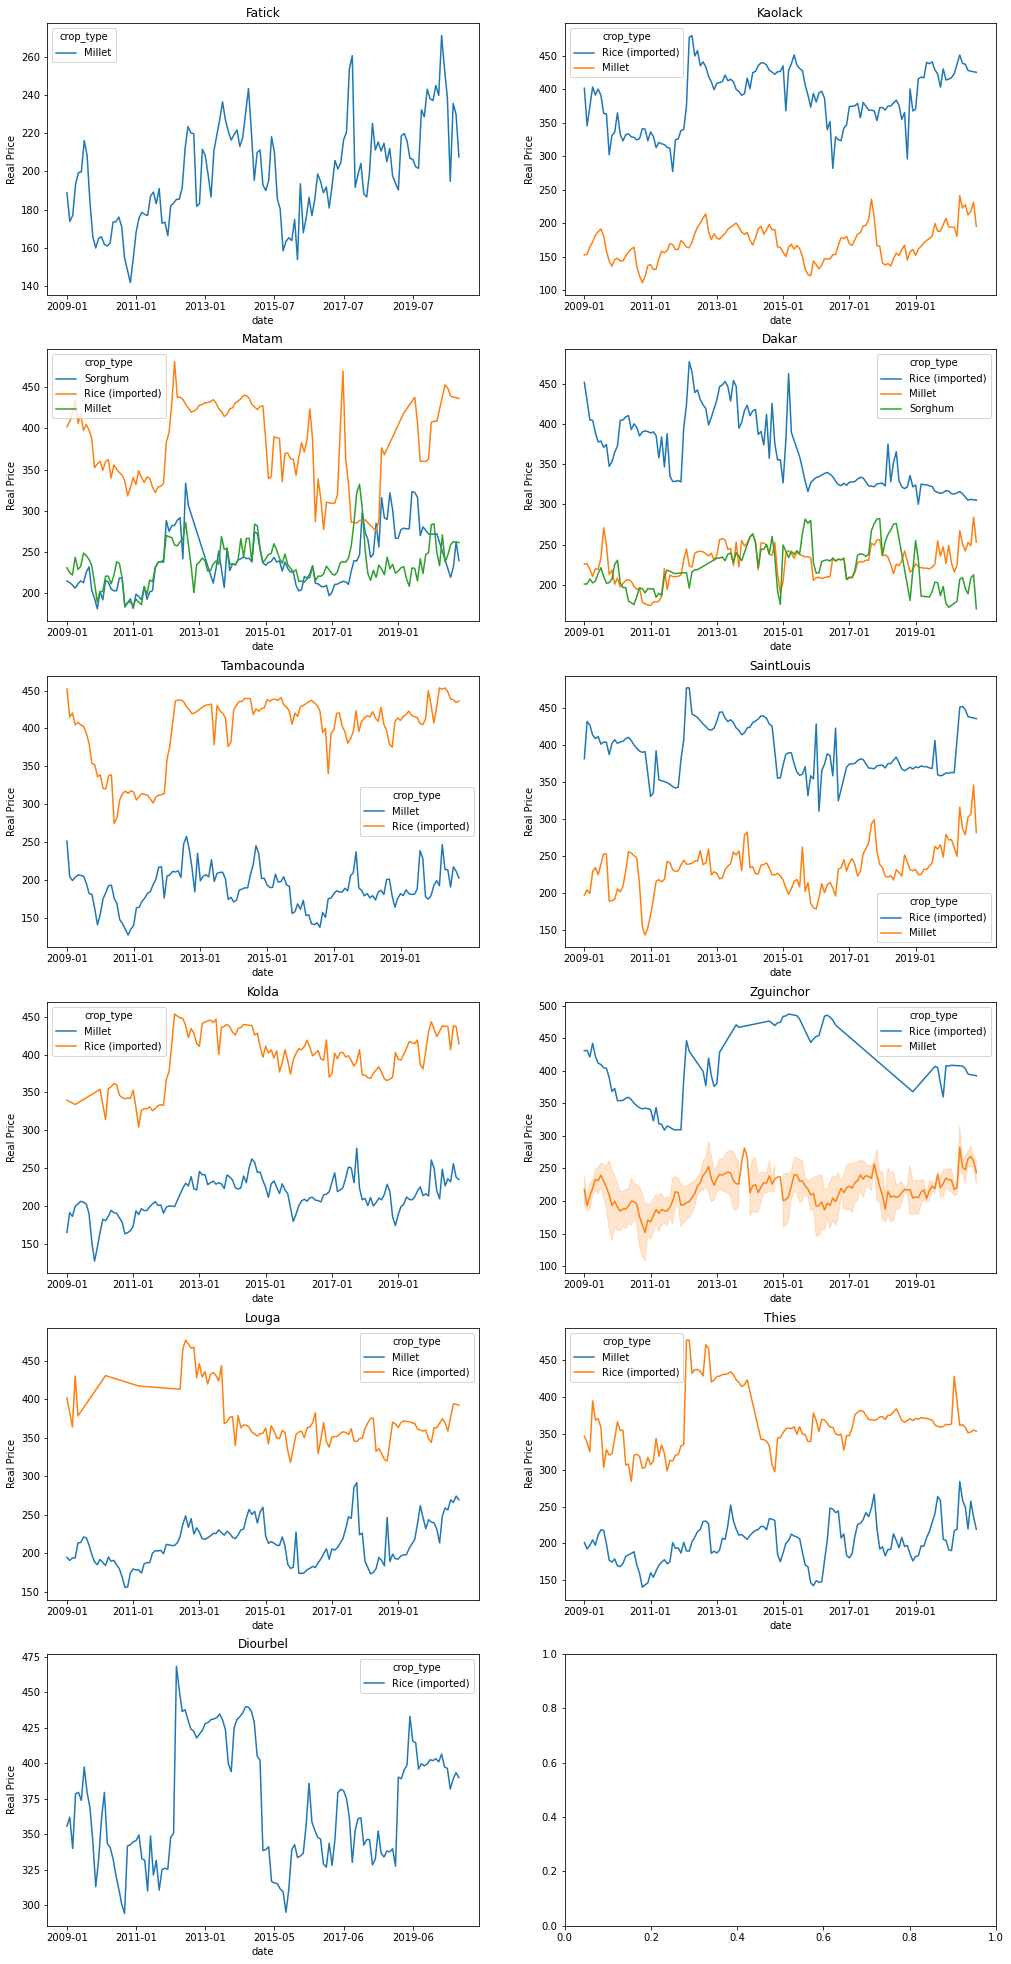

In [31]:
fig, ax = plt.subplots(6,2, figsize=(17,35))
ax = ax.flatten()

for i in range(len(regions)):
    sns.lineplot(data = df_market[df_market['region'] == regions[i]], x = 'date', 
                 y = 'Real Price', hue='crop_type', ax = ax[i])
    ax[i].set_title(regions[i])
    ax[i].set_xticks(df_market[df_market['region'] == regions[i]].index.unique().to_list()[::24])

In [32]:

df_market.head()

,Ipa series,Real Price,region,crop_type
date,,,,
2009-01,NaN,188.85,Fatick,Millet
2009-01,NaN,401.82,Kaolack,Rice (imported)
2009-01,NaN,214.97,Matam,Sorghum
2009-01,NaN,401.82,Matam,Rice (imported)
2009-01,NaN,452.05,Dakar,Rice (imported)


In [33]:
# get just rice, which is everywhere
df_market['crop_type'].unique()

array(['Millet', 'Rice (imported)', 'Sorghum'], dtype=object)

In [34]:
df2 = df_market[df_market['crop_type'] == 'Rice (imported)']


In [35]:
len(df2['region'].unique())

10

In [36]:
df2['region'].unique()


array(['Kaolack', 'Matam', 'Dakar', 'SaintLouis', 'Zguinchor', 'Kolda',
       'Diourbel', 'Thies', 'Louga', 'Tambacounda'], dtype=object)